In [203]:
import io
import torch
import numpy as np
import random
import scipy.stats as sp
import matplotlib.pyplot as plt


from torchvision import datasets
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression


plt.rcParams['figure.figsize'] = [16, 8]


regressors = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
y = np.array([75,77,76,73,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])
a = np.shape(temperature)
X = np.empty([a[0], 11])
x = np.arange(1,25,1)
for k in range (11):
    for i in range(a[0]):
        X[i,k]= x[i]**k
       

print("X", np.shape(X))


X (24, 11)


In [204]:
def train(regressors, x, y):
    
    coefs = np.empty([11, 4])  #24,11,4
    y_predict = np.empty([24,4])
    for i,model in enumerate(regressors):
        model.fit(x, y)
        coefs[:,i] = model.coef_.ravel()
        y_predict[:,i] = model.predict(x)

       
    return coefs, y_predict

alpha, y_predict = train(regressors, X, y)
#print(alpha)
print(y_predict)
print(np.shape(y_predict))

[[75.11365541 75.93095158 76.74071146 76.35394818]
 [76.80759824 74.85799694 76.10576759 75.18131442]
 [75.80542881 73.34072921 74.62759334 73.56088341]
 [73.24864615 71.45112536 72.46891928 71.56910306]
 [69.94550169 69.26199272 69.80804813 69.28343488]
 [66.43184711 66.83712074 66.82203377 66.77419166]
 [63.01440952 64.2014234  63.66087999 64.08008908]
 [59.78244676 61.26553801 60.39898404 61.14682564]
 [57.53025993 59.43587156 57.88135342 59.11898568]
 [54.71395764 55.95615044 54.71603245 55.79194465]
 [53.64497896 54.86568892 53.43630804 54.62265862]
 [51.38834831 51.67862636 50.93358154 51.56914895]
 [50.44280998 50.46293519 50.0133867  50.28342087]
 [49.98840379 49.55387372 50.01179263 49.5632919 ]
 [48.7603702  48.51376326 48.17813157 48.40142273]
 [49.38764924 49.09947161 49.66815225 49.04610589]
 [49.43140091 49.11838666 49.66982233 49.21179847]
 [50.22492882 49.93078434 50.47283038 50.03860689]
 [53.37215654 53.59194194 53.96239861 53.55153957]
 [55.40058573 54.97947629 55.56

C:\Users\miche\anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.050e+01, tolerance: 2.145e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\miche\anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.101e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\miche\anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.348e+01, tolerance: 2.145e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol,

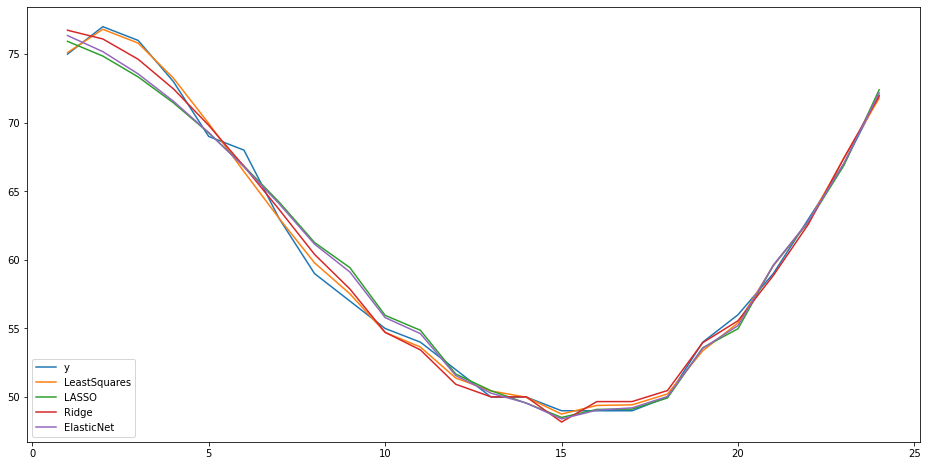

In [205]:
plt.plot(x, y, label = "y" )
plt.plot(x, y_predict[:,0], label = "LeastSquares" )
plt.plot(x, y_predict[:,1], label = "LASSO" )
plt.plot(x, y_predict[:,2], label = "Ridge" )
plt.plot(x, y_predict[:,3], label = "ElasticNet" )
plt.legend()
plt.show()

In [206]:
index = random.randrange(25)
print(index)
np.put(y, [index], [0])
print("corrupted temperature", y)

12
corrupted temperature [75 77 76 73 69 68 63 59 57 55 54 52  0 50 49 49 49 50 54 56 59 63 67 72]


In [208]:
alpha_corr, y_predict_corr = train(regressors, X, y)
print(y_predict_corr)
print(np.shape(y_predict_corr))

[[77.10573013 78.89791873 74.95789515 79.29028071]
 [74.26832857 77.49005394 75.22151998 77.82900587]
 [73.57235419 75.29877285 75.14693401 75.55929415]
 [73.14900082 72.46213728 74.17943107 72.62769187]
 [71.91629102 69.1281453  72.08177119 69.1909964 ]
 [69.44505011 65.46380602 68.90483163 65.42760327]
 [65.93167494 61.69672688 65.05346939 61.58644934]
 [62.40599558 58.24282049 61.57554115 58.13379273]
 [50.42067878 50.49559242 49.9530468  50.10609203]
 [46.55876712 46.08574544 46.56512896 45.89192579]
 [57.81673027 59.52394868 58.10795534 59.22073468]
 [39.6605845  41.7752271  40.28077092 41.63161544]
 [26.22924834 30.96727487 26.80978545 30.71222841]
 [46.9846078  48.46228393 46.94913047 48.46915404]
 [42.82407634 46.67780566 43.61081494 46.51779849]
 [41.39131173 43.69204054 41.00545343 43.610028  ]
 [60.48588593 59.30827096 60.16128488 59.44167622]
 [48.34936198 46.86838021 48.01275274 47.0199145 ]
 [46.32076348 46.36669369 45.51955744 46.32149606]
 [56.76292685 52.6345626  56.54

C:\Users\miche\anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.662e+02, tolerance: 5.565e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\miche\anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.101e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\miche\anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.591e+02, tolerance: 5.565e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol,

In [209]:
error_0 = MSE(y_true, y_predict_corr[:,0])
error_1 = MSE(y_true, y_predict_corr[:,1])
error_2 = MSE(y_true, y_predict_corr[:,2])
error_3 = MSE(y_true, y_predict_corr[:,3])
print("MSE Least-Square", error_0)
print("MSE LASSO", error_1)
print("MSE Ridge", error_2)
print("MSE Elastic Net", error_3)

MSE Least-Square 212.52201000613846
MSE LASSO 179.23519278903368
MSE Ridge 206.62720675083185
MSE Elastic Net 179.54209011944099
